In [ ]:
#RANDOM WALK METROPOLIS HASTINGS                          
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from google.colab import files

In [ ]:

dimension=150
medias=np.arange(1,dimension+1,1)
sigma_bivariada=np.diag(medias/2)   #varianzas. 
sigma_bivariada_inv=np.linalg.inv(sigma_bivariada)

def U(q):
  return(1/2*(q-medias).dot(sigma_bivariada_inv ).dot(np.transpose(q-medias))[0][0])    #El logaritmo de la densidad que queremos simular, U(q) hacer referencia a la funcion de energía potencial 

def grad_U(q):   #El gradiente de la función U, que se utilizará para resolver el sistema de ecuaciones dado por las dinámicas hamiltonianas
 return(np.transpose(sigma_bivariada_inv.dot(np.transpose(q-medias))))



In [ ]:

def HMCMC(U, grad_U, epsilon, L, inicial_q, N):
  #En el primer paso nuevos valores son  escogidos para el momentum, p, aleatoriamente de una distribución normal, y son independientes de la posición q. 
  mu, sigma = 0, 1 # Parametros de la normal
  
  q = inicial_q #El punto de inicio del algoritmo
  cadena=q
  rechazos=0
  for i in range(1,N): 

    p = np.array([np.random.normal(mu, sigma, q.shape[1])])  #Asignamos el nuevo valor de p, independiente de q

    actual_p = p  
    #empieza Leapfrog
    p=p- epsilon * grad_U(q) / 2

    for i in range(1,L+1):
      q= q+epsilon*p
      if(i!=L):
        p=p-epsilon*grad_U(q)
    p= p - epsilon * grad_U(q) / 2   #termina el algoritmo de Leap Frog 

    p = -p
    actual_U = U(inicial_q)
    actual_K = np.sum(actual_p**2) / 2
    propuesta_U = U(q)
    propuesta_K = np.sum(p**2) / 2
    if random.uniform(0, 1) < np.exp(actual_U-propuesta_U+actual_K-propuesta_K):
      cadena=np.r_[cadena,q]
      inicial_q=q

    else:
      cadena=np.r_[cadena,inicial_q]
      rechazos=rechazos+1
  return(cadena, rechazos)


In [ ]:
muestra_hmc=np.array([np.zeros(dimension)])

np.random.seed(0)
random.seed(0)
t0_HMC = time.time()
simulaciones_ind=HMCMC(U,grad_U,0.12,50,muestra_hmc,5000) #generamos 5 mil simulaciones
t1_HMC = time.time()
print("--- %s segundos ---" % (t1_HMC- t0_HMC))

--- 10.612298250198364 segundos ---


In [ ]:
cadena_bruta= simulaciones_ind[0]
tasa_aceptacion= 1-simulaciones_ind[1]/(simulaciones_ind[0].shape[0]-1)
tasa_aceptacion

0.9861972394478896

Text(0.5, 0, 'Variable')

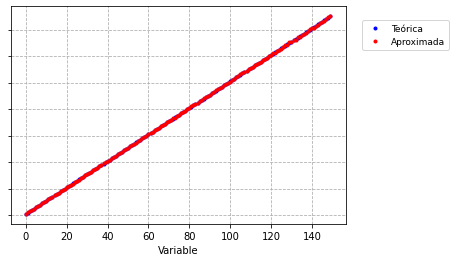

In [ ]:
promedios_emp=np.apply_along_axis(np.mean, 0, cadena_bruta)
plt.plot(medias, '.b')
plt.grid(linestyle='dashed')
plt.plot(promedios_emp, '.r')
plt.gca().axes.yaxis.set_ticklabels([])
plt.legend(('Teórica', 'Aproximada'), bbox_to_anchor=(1.05,0.8), loc=3, borderaxespad=0, prop={'size':9})
plt.xlabel('Variable')
#plt.savefig("dim_h1.png",bbox_inches='tight',dpi=300)
#files.download("dim_h1.png")

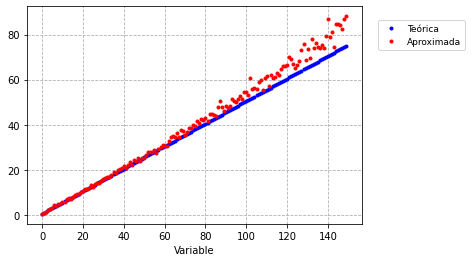

In [ ]:
desviaciones_emp=np.apply_along_axis(np.var, 0, cadena_bruta)
plt.plot(medias/2, '.b') #MEDIAS SON IGUALES A LAS VARIANZAS
plt.plot(desviaciones_emp, '.r')
plt.grid(linestyle='dashed')
plt.xlabel('Variable')
plt.legend(('Teórica', 'Aproximada'), bbox_to_anchor=(1.05,0.8), loc=3, borderaxespad=0, prop={'size':9})
#plt.savefig("dim_h2.png",bbox_inches='tight',dpi=300)
#files.download("dim_h2.png")

Text(0.5, 15.0, 'Iteración')

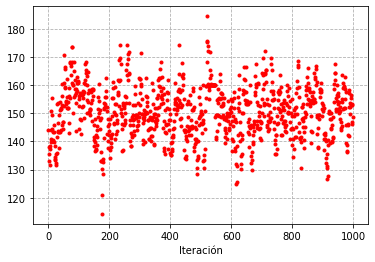

In [ ]:
plt.plot(cadena_bruta[len(cadena_bruta)-1000:len(cadena_bruta),149], ".r")
plt.savefig("dim_h3.png",bbox_inches='tight',dpi=300)
plt.grid(linestyle='dashed')
plt.xlabel('Iteración')
#plt.savefig("dim_h3.png",bbox_inches='tight',dpi=300)
#files.download("dim_h3.png")

#Ejemplo con RWMH 


In [ ]:

dimension=150
medias=np.arange(1,dimension+1,1)
sigma_bivariada=np.diag(medias/2)   #varianzas. 
sigma_bivariada_inv=np.linalg.inv(sigma_bivariada)


def razonf(q1,q2):
  return(np.exp( 1/2*(q2-medias).dot( sigma_bivariada_inv ).dot(np.transpose(q2-medias))[0][0] -1/2*(q1-medias).dot( sigma_bivariada_inv ).dot(np.transpose(q1-medias))[0][0]))
def RWMH_dim(p_ini, mu, sigma, N):
  rechazos=0     #vector de muestras
  muestra=p_ini        #primera posición nuestro punto inicial
  for i in range(1, N):           
    propuesta=p_ini+np.random.normal(mu, sigma, p_ini.shape[1])    #el valor propuesto 
    razon = min(razonf(propuesta, p_ini),1)
    if random.uniform(0, 1) < razon:
      actual=propuesta
      p_ini=propuesta
    else:
      actual=p_ini
      rechazos=rechazos+1
      print( i)
    muestra=np.r_[muestra,actual]
  #uno es el punto inicial y en la ultima posicion esta el porcentaje
  return(muestra, rechazos)


In [ ]:
inicial=np.array([np.zeros(dimension)])
np.random.seed(0)
random.seed(0)
t0_HMC = time.time()
muestra_RWMH=RWMH_dim(inicial,0,0.12,5000*50)  #generamos 5 mil simulaciones
t1_HMC = time.time()
print("--- %s segundos ---" % (t1_HMC- t0_HMC))

#9018.36

In [ ]:
cadena_brutar = muestra_RWMH[0]
tasa_aceptacion2= 1-muestra_RWMH[1]/(cadena_brutar.shape[0]-1)
tasa_aceptacion2
#cadena_sl= cadena_brutar[np.arange(0,len(cadena_brutar),50)]  

0.8286513146052584

In [ ]:
muestra_RWMH

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.11686282e-01,  4.80188650e-02,  1.17448558e-01, ...,
          1.34041955e-01, -1.57908889e-01, -5.53901526e-02],
        [ 2.11686282e-01,  4.80188650e-02,  1.17448558e-01, ...,
          1.34041955e-01, -1.57908889e-01, -5.53901526e-02],
        ...,
        [-2.39007805e-01,  3.27965200e+00,  4.15842415e+00, ...,
          1.58031591e+02,  1.47400388e+02,  1.38718814e+02],
        [-3.01015895e-01,  3.26397385e+00,  4.06645585e+00, ...,
          1.58111300e+02,  1.47363199e+02,  1.38735842e+02],
        [-2.68086399e-01,  3.23845901e+00,  4.17210414e+00, ...,
          1.58026909e+02,  1.47192595e+02,  1.38588010e+02]]), 0)

In [ ]:
tasa_aceptacion

0.9861972394478896

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

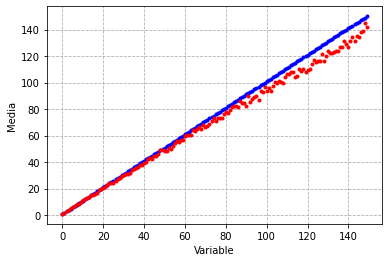

In [ ]:
promedios_emp=np.apply_along_axis(np.mean, 0, cadena_sl)
plt.plot(medias, '.b')
plt.grid(linestyle='dashed')
plt.plot(promedios_emp, '.r')
plt.ylabel('Media')
plt.xlabel('Variable')

#plt.savefig("dim_rw1.png",bbox_inches='tight',dpi=300)
#files.download("dim_rw1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

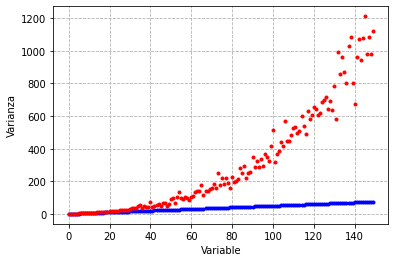

In [ ]:
desviaciones_emp=np.apply_along_axis(np.var, 0, cadena_sl)
plt.plot(medias/2, '.b') #MEDIAS SON IGUALES A LAS VARIANZAS
plt.plot(desviaciones_emp, '.r')
plt.grid(linestyle='dashed')
plt.ylabel('Varianza')
plt.xlabel('Variable')
#plt.savefig("dim_rw2.png",bbox_inches='tight',dpi=300)
#files.download("dim_rw2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

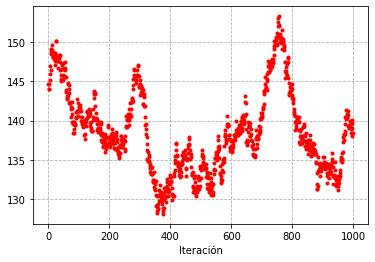

In [ ]:
plt.plot(cadena_sl[len(cadena_sl)-1000:len(cadena_sl),149], ".r")
plt.grid(linestyle='dashed')
plt.xlabel('Iteración')
plt.savefig("dim_rw3.png",bbox_inches='tight',dpi=300)
files.download("dim_rw3.png")